In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [3]:
speakers = ['F01','F02','F04','F05','F06','M01','M02','M04','M07','M08'] 
word_folder = ['01','02','03']
varieties = ['01','02','03','04','05','06','07','08', '09', '10']
words = ['Begin', 'Choose', 'Connection']

In [11]:
df=pd.read_csv("/content/gdrive/My Drive/lip_reading/df.csv")
df=df.iloc[:,1:]
df.head()

,speaker,word,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,...,pixel17960,pixel17961,pixel17962,pixel17963,pixel17964,pixel17965,pixel17966,pixel17967,pixel17968,pixel17969,pixel17970,pixel17971,pixel17972,pixel17973,pixel17974,pixel17975,pixel17976,pixel17977,pixel17978,pixel17979,pixel17980,pixel17981,pixel17982,pixel17983,pixel17984,pixel17985,pixel17986,pixel17987,pixel17988,pixel17989,pixel17990,pixel17991,pixel17992,pixel17993,pixel17994,pixel17995,pixel17996,pixel17997,pixel17998,pixel17999
0,0,0,91.0,91.0,91.0,88.0,86.0,84.0,79.0,75.0,76.0,77.0,82.0,92.0,95.0,96.0,95.0,95.0,93.0,89.0,91.0,98.0,107.0,110.0,113.0,115.0,115.0,113.0,113.0,113.0,111.0,111.0,88.0,88.0,88.0,85.0,83.0,80.0,75.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,88.0,88.0,89.0,88.0,84.0,80.0,74.0,65.0,62.0,63.0,65.0,69.0,75.0,83.0,91.0,92.0,89.0,89.0,89.0,91.0,93.0,99.0,101.0,109.0,108.0,108.0,104.0,98.0,85.0,73.0,85.0,86.0,88.0,84.0,78.0,74.0,68.0,63.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,95.0,95.0,95.0,95.0,95.0,95.0,93.0,90.0,85.0,84.0,85.0,91.0,98.0,103.0,103.0,101.0,97.0,94.0,95.0,99.0,104.0,110.0,116.0,116.0,117.0,115.0,113.0,111.0,108.0,104.0,93.0,93.0,93.0,92.0,92.0,90.0,89.0,86.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,89.0,89.0,89.0,88.0,82.0,78.0,74.0,69.0,68.0,70.0,73.0,78.0,84.0,93.0,100.0,100.0,96.0,98.0,98.0,97.0,99.0,105.0,109.0,111.0,108.0,108.0,105.0,98.0,82.0,73.0,87.0,87.0,85.0,83.0,77.0,73.0,71.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,103.0,102.0,102.0,100.0,99.0,95.0,92.0,87.0,83.0,86.0,90.0,100.0,105.0,107.0,101.0,95.0,92.0,94.0,97.0,105.0,115.0,116.0,119.0,123.0,123.0,121.0,121.0,123.0,123.0,120.0,103.0,102.0,102.0,101.0,98.0,95.0,90.0,86.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#Convert Null data to 0
df=df.replace(np.NaN, 0)

In [22]:
#Normalized data
scaler=MinMaxScaler()
scaler.fit(df)
scaler.transform(df)

X= df.drop("word",axis=1)
Y=df.word

In [23]:
from sklearn.model_selection import train_test_split
#%80 Train, %20 Test
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [27]:
print("X_train: ", X_train.shape)
print("X_test: ", x_test.shape)
print("y_train: ", Y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (240, 18001)
X_test:  (60, 18001)
y_train:  (240,)
y_test:  (60,)


## **KNN**

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
test_acc_knn=[]
train_acc_knn=[]
range=[3,4,5,6,7,8,9,10]
for each in range:
  neigh = KNeighborsClassifier(n_neighbors=each)
  neigh.fit(X_train, Y_train)
  y_pred_test=neigh.predict(x_test)
  y_pred_tr=neigh.predict(X_train)
  test_acc_knn.append(accuracy_score(y_test, y_pred_test))
  train_acc_knn.append(accuracy_score(Y_train, y_pred_tr))

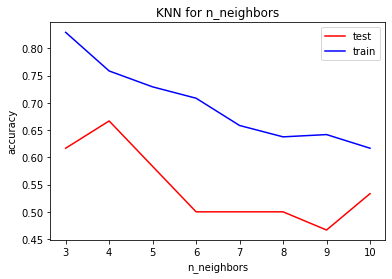

In [73]:
import matplotlib.pyplot as plt

plt.plot(range,test_acc_knn,"r")
plt.plot(range,train_acc_knn,"b")
plt.legend(['test','train'])
plt.title('KNN for n_neighbors')
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.show()

# **SVM**

In [64]:
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train, Y_train)
y_pred_test_svm=svm_model.predict(x_test)
y_pred_tr_svm=svm_model.predict(X_train)

test_acc_svm=accuracy_score(y_test, y_pred_test_svm)
train_acc_svm=accuracy_score(Y_train, y_pred_tr_svm)

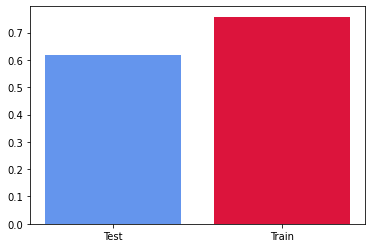

In [71]:
x=["Test","Train"]
y=[test_acc_svm,train_acc_svm]
plt.bar(x,y,color=[ 'cornflowerblue', 'crimson'])

plt.show()


## **Random Forest**

In [48]:
from sklearn.ensemble import RandomForestClassifier

test_acc_rf=[]
train_acc_rf=[]
range_rf=[1,2,3,4,5,6,7,8,9,10,11,12,13,14]
for each in range_rf:
  rf_model = RandomForestClassifier(max_depth=each, random_state=0)
  rf_model.fit(X_train, Y_train)
  y_pred_test_rf=rf_model.predict(x_test)
  y_pred_tr_rf=rf_model.predict(X_train)
  test_acc_rf.append(accuracy_score(y_test, y_pred_test_rf))
  train_acc_rf.append(accuracy_score(Y_train, y_pred_tr_rf))

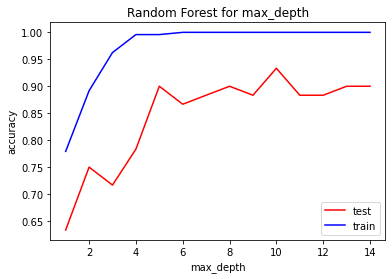

In [72]:
import matplotlib.pyplot as plt

plt.plot(range_rf,test_acc_rf,"r")
plt.plot(range_rf,train_acc_rf,"b")
plt.legend(['test','train'])
plt.xlabel("max_depth")
plt.title('Random Forest for max_depth')
plt.ylabel("accuracy")
plt.show()

# **Decision Tree**

In [51]:
from sklearn.tree import DecisionTreeClassifier

test_acc_dt=[]
train_acc_dt=[]
range_dt=[1,2,3,4,5,6,7,8,9,10,11,12,13,14]
for each in range_dt:
  dt_model = DecisionTreeClassifier(max_depth=each, random_state=0)
  dt_model.fit(X_train, Y_train)
  y_pred_test_dt=dt_model.predict(x_test)
  y_pred_tr_dt=dt_model.predict(X_train)
  test_acc_dt.append(accuracy_score(y_test, y_pred_test_dt))
  train_acc_dt.append(accuracy_score(Y_train, y_pred_tr_dt))

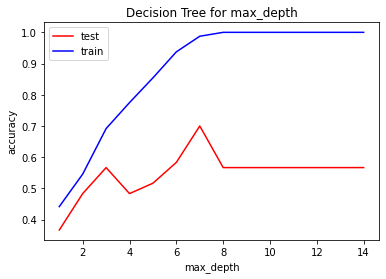

In [74]:
import matplotlib.pyplot as plt

plt.plot(range_dt,test_acc_dt,"r")
plt.plot(range_dt,train_acc_dt,"b")
plt.title('Decision Tree for max_depth')
plt.legend(['test','train'])
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.show()

## **Result**

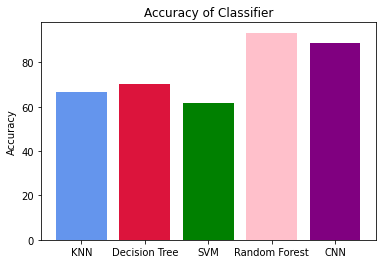

In [70]:
x_axis = ["KNN", "Decision Tree","SVM","Random Forest","CNN"]
y_axis = [max(test_acc_knn)*100, max(test_acc_dt)*100, test_acc_svm*100, max(test_acc_rf)*100, 88.8]
plt.bar(x_axis,y_axis,color=[ 'cornflowerblue', 'crimson',"green","pink","purple"])
plt.ylabel('Accuracy')
plt.title('Accuracy of Classifier')
plt.show()